## 【問題1】断面図の作成

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)


In [2]:
fuji[:, 0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [3]:
fuji[-300, 3]

0.0

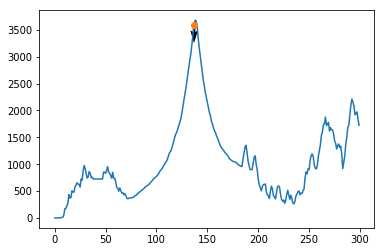

In [4]:
plt.plot(fuji[:, 0], fuji[:, 3])
plt.plot(fuji[:, 0][137], fuji[:, 3][137], marker="o")
plt.quiver(fuji[:, 0][137], fuji[:, 3][137], fuji[:, 0][136]-fuji[:, 0][137], fuji[:, 3][136]-fuji[:, 3][137])

## 【問題2】勾配の計算の関数

input データ、今いる地点x

def 引数x
    x-1
    データの探索：、xの時のy、x-1の時のy-1
    return　yの変化量/x変化量

output　勾配


In [5]:
def calculate_gradient(current_point):
    """
    
    Palameters
    ----------
    current_point:int　現地点x
    current_elevation:int　現地点xでの標高
    next_point:int　次点x-1
    next_elevation:int 次点x-1での標高
    
    Return
    ----------
    勾配
    
    """
    current_elevation = fuji[current_point-1,3]
    next_point = current_point - 1
    next_elevation = fuji[next_point-1, 3]
    return (next_elevation - current_elevation) / (next_point - current_point)

In [6]:
calculate_gradient(136)

178.42999999999984

## 【問題3】勾配降下法の関数を作成

「移動すべき地点 = 今いる地点 - α ×今いる地点の勾配」  

input 現地点x、パラメータα

def 引数x、パラメータα
    リストを用意
    移動すべき地点 = x -α×今いる地点の勾配
    移動すべき地点を四捨五入
    return 移動すべき点をリストに追加
output 

In [7]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math

def calculate_moving_point(current_point, alpha=0.5):
    elevation_list = []
    
    # 移動すべき点を算出
    #point_to_move = current_point - alpha*calculate_gradient(current_point)
    
    for i in range(100):
        if i == 0:
            current_elevation = fuji[current_point, 3]
        else:
            # 現時点を更新する。
            current_point -= alpha*calculate_gradient(current_point)
            # current_point = int(Decimal(str(current_point)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
            current_point = math.trunc(current_point)
            # 移動すべき点を四捨五入
            current_elevation = fuji[current_point, 3]
        
        # リストに追加。
        elevation_list.append(current_elevation)
    
    return elevation_list

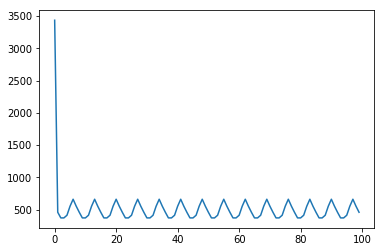

In [8]:
plt.plot(calculate_moving_point(136, 0.3))

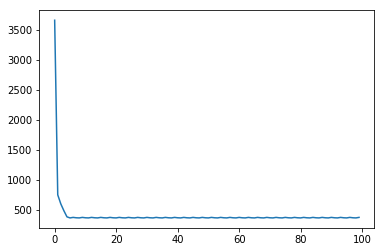

In [9]:
plt.plot(calculate_moving_point(139, 0.5))

In [10]:
array1 = np.ones(300)

In [11]:
array2 = np.arange(300)

In [12]:
array2 + 1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
from multiprocessing import Pool
import multiprocessing as multi

p = Pool(multi.cpu_count())
p.map(calculate_moving_point, list(range(5)))

IndexError: index 863 is out of bounds for axis 0 with size 300

## 【途中】【問題6】（アドバンス課題）ハイパーパラメータの検証

In [36]:
def calculate_moving_point_with_alpha(current_point, alpha):
    elevation_list = []
    
    # 移動すべき点を算出
    #point_to_move = current_point - alpha*calculate_gradient(current_point)
    
    for i in range(100):
        if i == 0:
            current_elevation = fuji[current_point, 3]
        else:
            # 現時点を更新する。
            current_point -= alpha*calculate_gradient(current_point)
            # current_point = int(Decimal(str(current_point)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
            current_point = math.trunc(current_point)
            # 移動すべき点を四捨五入
            current_elevation = fuji[current_point, 3]
            print(current_point)
        
        # リストに追加。
        elevation_list.append(current_elevation)
    
    return elevation_list, alpha

In [33]:
from multiprocessing import Pool
import multiprocessing as multi

p = Pool(multi.cpu_count())
p.map(calculate_moving_point_with_alpha,) 

57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70
57
82
70


IndexError: index 863 is out of bounds for axis 0 with size 300